# Wine Binary Classification

Import the white wine quality data into a `DataFrame` (this is different than the red wine data we worked with previously).

Perform the following tasks:

1. Analyze the data

2. In a new column called `binary`, map any `quality` less than `6` as `0` and greater than `6` as `1`

3. Choose all or some features to train on

4. Perform a logistic regression using a train/test split

5. Calculate the `accuracy_score`, `precision_score`, and `recall_score` on the test dataset.  

6. Contemplate and document what a higher precision versus a higher recall will achieve in this example. If we want to set a higher bar for "high quality wine" (a predicted value of `1`), which do we prioritize? What could we do to try and balance the two metrics?

7. Perform steps 3-5 but using a cross-validation, and test other combinations of features to see the three metrics. Try passing 'accuracy', 'specificity', and 'recall' as scoring metrics in separate runs.

8. Is the data imbalanced? If so, enable the commented code below to have the number of `0` records equal to the number of `1` records. Then re-run the notebook and study the results.

In [1]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





In [2]:
""" 
# balance the data
balanced_0 = df[df["binary"] == 0].sample(1060)
balanced_1 = df[df["binary"] == 1]

balanced_df = pd.concat([balanced_0, balanced_1])
df = balanced_df

"""

' \n# balance the data\nbalanced_0 = df[df["binary"] == 0].sample(1060)\nbalanced_1 = df[df["binary"] == 1]\n\nbalanced_df = pd.concat([balanced_0, balanced_1])\ndf = balanced_df\n\n'

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/regression/winequality-white.csv')


# 1. Analyze the Data

In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
# Check for missing values
print(df.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


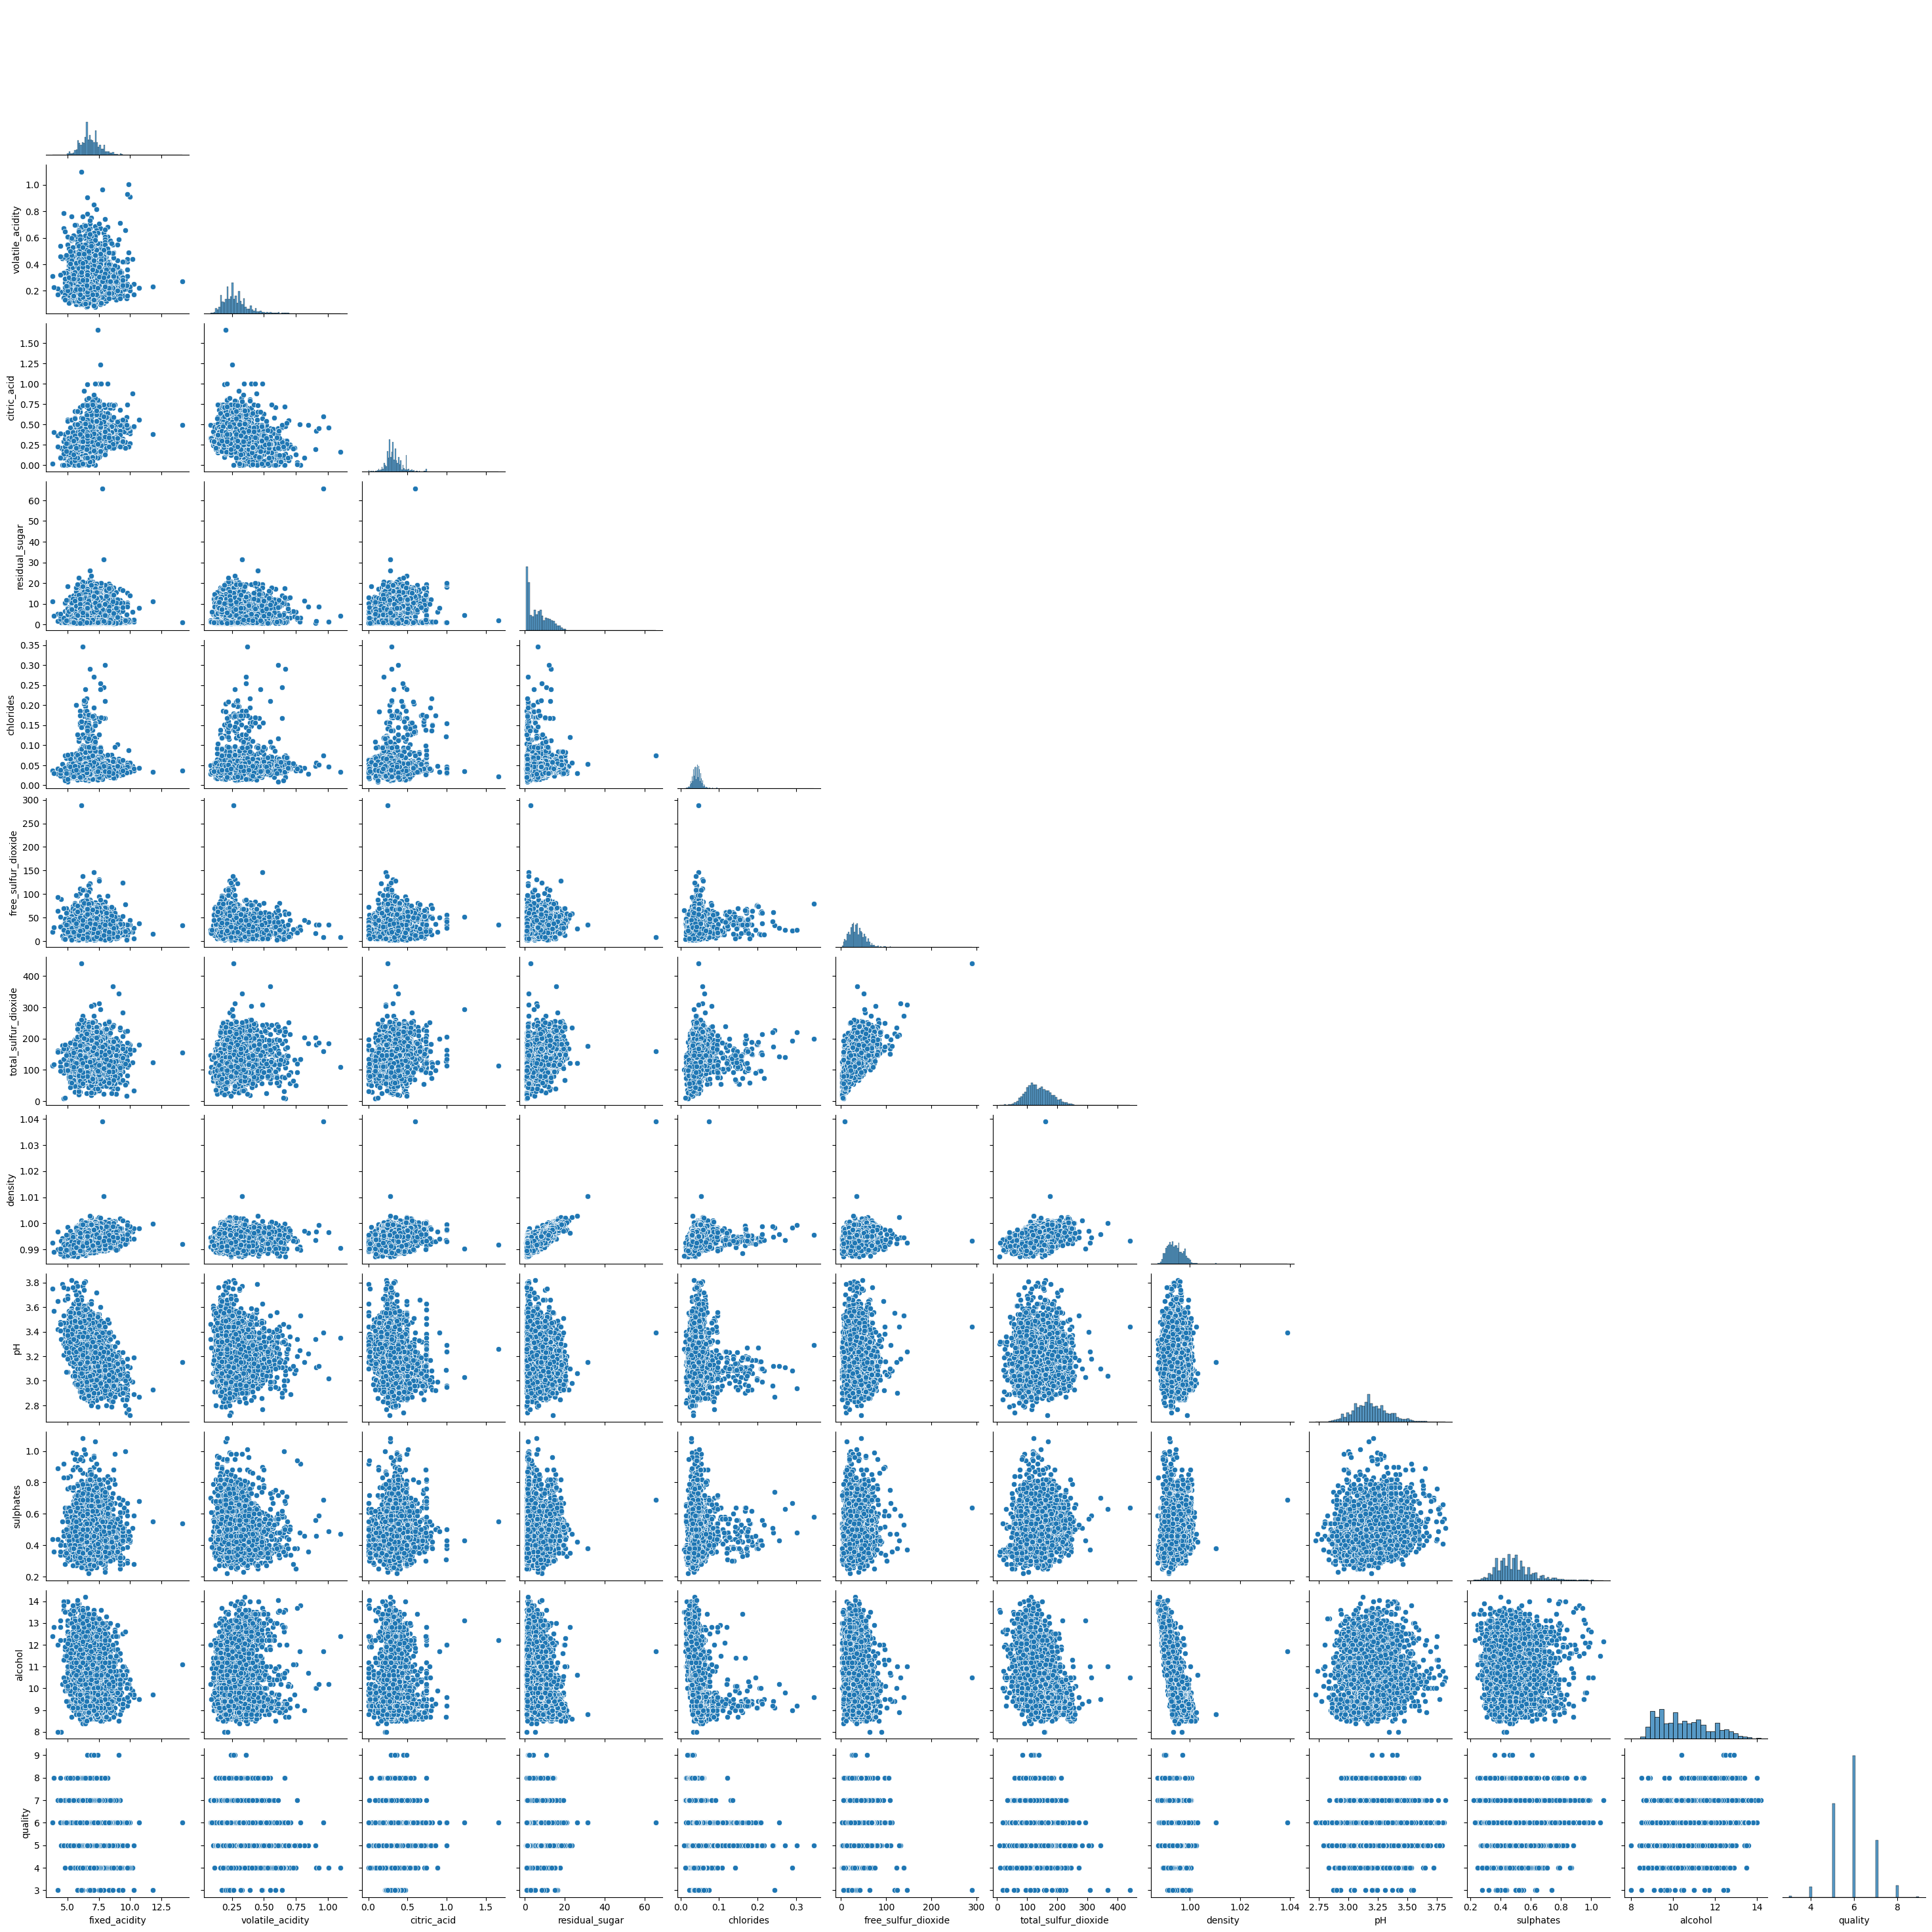

In [8]:
# Pairplot to visualize relationships between variables
sns.pairplot(df,corner=True)
plt.show()


In [9]:
#Statistical analysis
#Correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


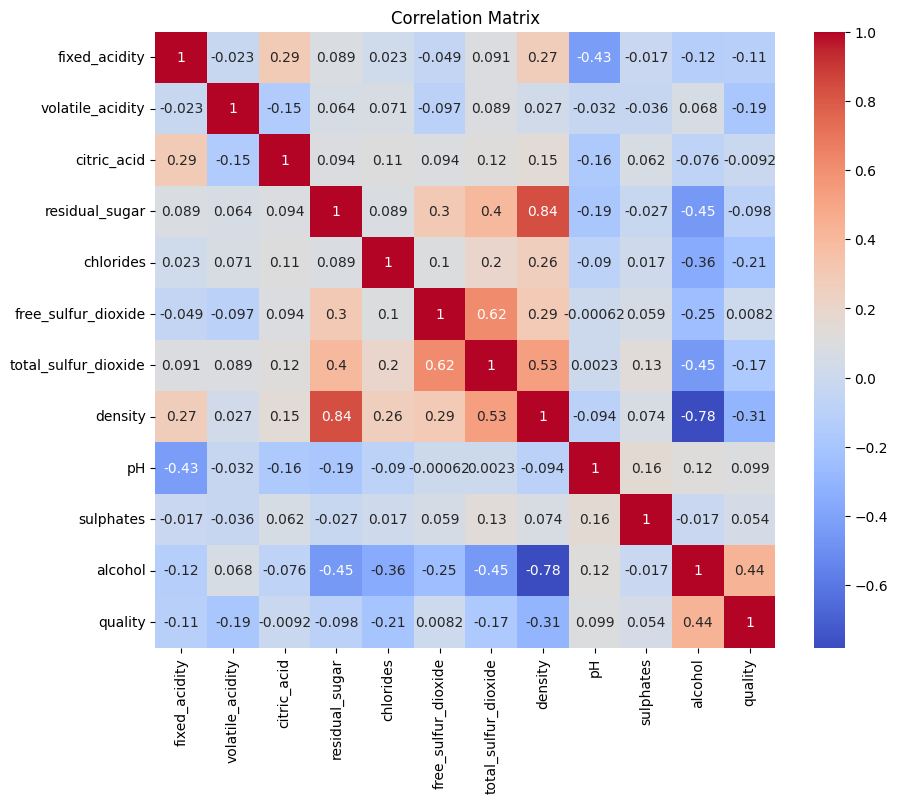

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [12]:
df.quality.value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

## 2. Map `binary` column

Add a `binary` column that makes the wine quality binary, where 6 or less being `0` and more than 6 being `1`.

In [13]:
# Define a function to map glass types to binary values
def map_quality(quality):
    if quality <=6:
        return 0
    else:
        return 1
    

In [14]:
# Apply the function to create the 'binary' column
df['binary'] = df['quality'].map(map_quality)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,binary
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [15]:
# another way
# df['binary'] = df['quality ].map({3:0, 4:0, 5:0, 6:0, 7:1, 8:1, 9:1})
# df


In [16]:
df.binary.unique()

array([0, 1])

In [17]:
df.binary.value_counts()

binary
0    3838
1    1060
Name: count, dtype: int64

## 3. Choose All or Some Features to Train On

In [18]:
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,binary
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0


In [42]:
features = ['alcohol', 'density','chlorides','volatile_acidity','total_sulfur_dioxide']
X=df[features]
y=df.binary

In [43]:
X.head(3)

,alcohol,density,chlorides,volatile_acidity,total_sulfur_dioxide
933,9.6,0.99495,0.037,0.29,205.0
2172,9.2,0.99600,0.042,0.32,117.0
3968,9.5,0.99551,0.049,0.29,192.0


In [21]:
y.head(3)

0    0
1    0
2    0
Name: binary, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X shape:",X.shape)
print("y shape:",y.shape)
print()
print()
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X shape: (2120, 5)
y shape: (2120,)


X_train shape: (1696, 5)
X_test shape: (424, 5)
y_train shape: (1696,)
y_test shape: (424,)


## 4. Perform a Logistic Regression with a Train/Test Split

In [23]:
# ML stuff:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,precision_score, f1_score
# from sklearn.tree import DecisionTreeClassifier, \
# export_text, plot_tree
# from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression #logistic not linear!
# from sklearn.neighbors import KNeighborsClassifier #pick the classifier one

In [45]:
logreg = LogisticRegression() # C=1 default
logreg.fit(X_train, y_train)

LogisticRegression()

## 5. Calculate Accuracy, Precision, and Recall

In [46]:
y_pred=logreg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,

In [47]:
y_pred.shape

(424,)

In [48]:
y_pred.sum()

224

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[154,  57],
       [ 46, 167]])

In [50]:
# TP=154,TN=167, FP=46, FN=57

# manually to find accuracy
accu_score=(154+167)/(154+167+46+57)
accu_score

0.7570754716981132

In [30]:
# manually to find precision for 'binary=1'
# prec_score=49/(29+49)
# prec_score

0.6282051282051282

In [31]:
# manually to find recall for 'binary=0'
# recall_score_man=49/(178+49)
# recall_score_man

0.21585903083700442

In [32]:
#manullay to find specificity
# speci_score=29/(724+29)
# speci_score

0.03851261620185923

In [51]:
# Calculate testing accuracy
# previous test_accuracy=0.7887755102040817
test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy

0.7570754716981132

In [52]:
# Calculate  precision
test_precision = precision_score(y_test, y_pred)
test_precision

0.7455357142857143

In [53]:
# Calculate recall
test_recall =recall_score(y_test,y_pred)
test_recall

0.784037558685446

In [54]:
# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       211
           1       0.75      0.78      0.76       213

    accuracy                           0.76       424
   macro avg       0.76      0.76      0.76       424
weighted avg       0.76      0.76      0.76       424



## 6. Contemplate Scores


Precision can be seen as a measure of quality, and recall as a measure of quantity. A higher precision will have a higher correct prediction rate of quality wines, while a higher recall will capture more high quality wines but also falsely label more low quality wines as high quality.
If we want our high quality wine threshold to be high, we want a higher precision. We could balance these two metrics by moving the threshold in our logistic regression to classify on a boundary other than 50%, try other features, and utilize cross-validation to deal with variance.

## 7. Utilize Cross-Validation with Other Features

In [37]:
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation with all four features
# cv=KFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
prec_scores = cross_val_score(logreg, X, y, cv=10, scoring='precision')
rec_scores = cross_val_score(logreg, X, y, cv=10, scoring='recall')
f1_scores = cross_val_score(logreg, X, y, cv=10, scoring='f1')
# Print the mean scores across all folds
print("Mean Accuracy:", accuracy_scores.mean())
print("Mean Precision:", prec_scores.mean())
print("Mean Recall:", rec_scores.mean())
print("Mean F1-score:", f1_scores.mean())

Mean Accuracy: 0.791131839238763
Mean Precision: 0.5900462103745944
Mean Recall: 0.22264150943396227
Mean F1-score: 0.2957132471563641


In [38]:
features1= ['alcohol', 'density','chlorides','volatile_acidity','total_sulfur_dioxide','fixed_acidity']
X=df[features1]
y=df.binary

In [39]:
# 10-fold cross-validation with all four features
# cv=KFold(n_splits=10, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
prec_scores = cross_val_score(logreg, X, y, cv=5, scoring='precision')
rec_scores = cross_val_score(logreg, X, y, cv=5, scoring='recall')
f1_scores = cross_val_score(logreg, X, y, cv=5, scoring='f1')
# Print the mean scores across all folds
print("Mean Accuracy:", accuracy_scores.mean())
print("Mean Precision:", prec_scores.mean())
print("Mean Recall:", rec_scores.mean())
print("Mean F1-score:", f1_scores.mean())

Mean Accuracy: 0.787459298326072
Mean Precision: 0.5868558290443017
Mean Recall: 0.23301886792452828
Mean F1-score: 0.29560361552028225


## 8. Is the Data Imbalanced?

In [40]:
df.groupby(['binary']).count()['density']

binary
0    3838
1    1060
Name: density, dtype: int64

Let's replace the `DataFrame` with a balanced one. Then run previous df again

In [41]:
# balance the data
balanced_0 = df[df["binary"] == 0].sample(1060)
balanced_1 = df[df["binary"] == 1]

balanced_df = pd.concat([balanced_0, balanced_1])
df = balanced_df
